AUTO PI before CNN CHANGED all values

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential  # Assuming TensorFlow 2.0+
import keras
!pip install keras
from tensorflow.keras.callbacks import ModelCheckpoint
!pip install keras-preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l1, l2
import PIL.Image
from tensorflow.keras.preprocessing.image import load_img

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
import zipfile
import os

# Specify the path to your zip file
zip_file_path = '/content/42.zip'

# Specify the directory where you want to extract the files
extract_to_dir = '/content/29unzip'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_to_dir, exist_ok=True)

# Open the zip file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

# Print a message indicating the extraction directory
print(f"Files extracted to {extract_to_dir}")

Files extracted to /content/29unzip


In [ ]:
!pip install tensorflow keras numpy matplotlib

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
input_folder = '/content/29unzip/1111/Bengin cases'
output_folder = '/content/29unzip/1111/Bengin cases'
os.makedirs(output_folder, exist_ok=True)

target_total = 465
current_count = len(os.listdir(input_folder))
images_needed = target_total - current_count

image_files = os.listdir(input_folder)
generated = 0

while generated < images_needed:
    for img_file in image_files:
        img_path = os.path.join(input_folder, img_file)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate one augmented image per iteration
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_folder,
                                  save_prefix='aug', save_format='jpeg'):
            generated += 1
            if generated >= images_needed:
                break
    if generated >= images_needed:
        break

print(f"Generated {generated} augmented images.")

Generated 464 augmented images.


In [ ]:
#count number of images and classes Benign=0 maligant=1
ROOT_DIR="/content/29unzip/1111"
number_of_images={}
for dir in os.listdir(ROOT_DIR):
       number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))
       number_of_images.items()

In [ ]:
 number_of_images.items()

dict_items([('Bengin cases', 572), ('Malignant cases', 561)])

In [ ]:
import os
import shutil
import random
import math

ROOT_DIR = '/content/29unzip/1111'  # replace with your dataset root
random.seed(42)  # for reproducibility

# Count the number of images in each class
number_of_images = {}
for dir_name in os.listdir(ROOT_DIR):
    dir_path = os.path.join(ROOT_DIR, dir_name)
    if os.path.isdir(dir_path):
        number_of_images[dir_name] = len(os.listdir(dir_path))

# Create train, validation, and test folders if not exist
for split in ['train111x', 'validation111x', 'test111x']:
    if not os.path.exists(split):
        os.mkdir(split)
        for class_name in os.listdir(ROOT_DIR):
            class_path = os.path.join(ROOT_DIR, class_name)
            if os.path.isdir(class_path):
                os.makedirs(os.path.join(split, class_name), exist_ok=True)

# Split the dataset
for class_name in os.listdir(ROOT_DIR):
    class_path = os.path.join(ROOT_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    all_images = os.listdir(class_path)
    random.shuffle(all_images)  # shuffle once

    total_images = len(all_images)
    train_size = int(0.8 * total_images)
    val_size = int(0.1 * total_images)
    test_size = total_images - train_size - val_size  # remainder to test

    train_images = all_images[:train_size]
    val_images = all_images[train_size:train_size + val_size]
    test_images = all_images[train_size + val_size:]

    # Move or copy files
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join('train111x', class_name, img))

    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join('validation111x', class_name, img))

    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join('test111x', class_name, img))

print("Dataset splitting completed successfully.")

Dataset splitting completed successfully.


In [ ]:
# Count the number of images in the validation folder
number_of_images_val = {}
for dir in os.listdir("./validation111x"):
    number_of_images_val[dir] = len(os.listdir(os.path.join("./validation111x", dir)))

number_of_images_val

{'Bengin cases': 57, 'Malignant cases': 56}

In [ ]:
# Count the number of images in the training folder
number_of_images_train = {}
for dir in os.listdir("./train111x"):
    number_of_images_train[dir] = len(os.listdir(os.path.join("./train111x", dir)))

number_of_images_train

{'Bengin cases': 457, 'Malignant cases': 448}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Count the number of images in the test folder
number_of_images_test = {}
for dir in os.listdir("./test111x"):
    number_of_images_test[dir] = len(os.listdir(os.path.join("./test111x", dir)))

number_of_images_test

{'Bengin cases': 58, 'Malignant cases': 57}

Found 905 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.4860 - loss: 0.6943 - val_accuracy: 0.5044 - val_loss: 0.6935 - learning_rate: 1.0000e-04
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 863ms/step - accuracy: 0.4999 - loss: 0.6936 - val_accuracy: 0.5044 - val_loss: 0.6948 - learning_rate: 1.0000e-04
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 925ms/step - accuracy: 0.4921 - loss: 0.6940 - val_accuracy: 0.5044 - val_loss: 0.6966 - learning_rate: 1.0000e-04
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 897ms/step - accuracy: 0.4745 - loss: 0.6932 - val_accuracy: 0.5044 - val_loss: 0.6989 - learning_rate: 1.0000e-04
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 907ms/step - accuracy: 0.5036 - loss: 0.6939 - val_accuracy: 0.5044 - val_loss: 0.7013 - learning_rate: 1.0000e-04
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - accuracy: 0.4826 - loss: 0.6935
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 893ms/step - accuracy: 0.

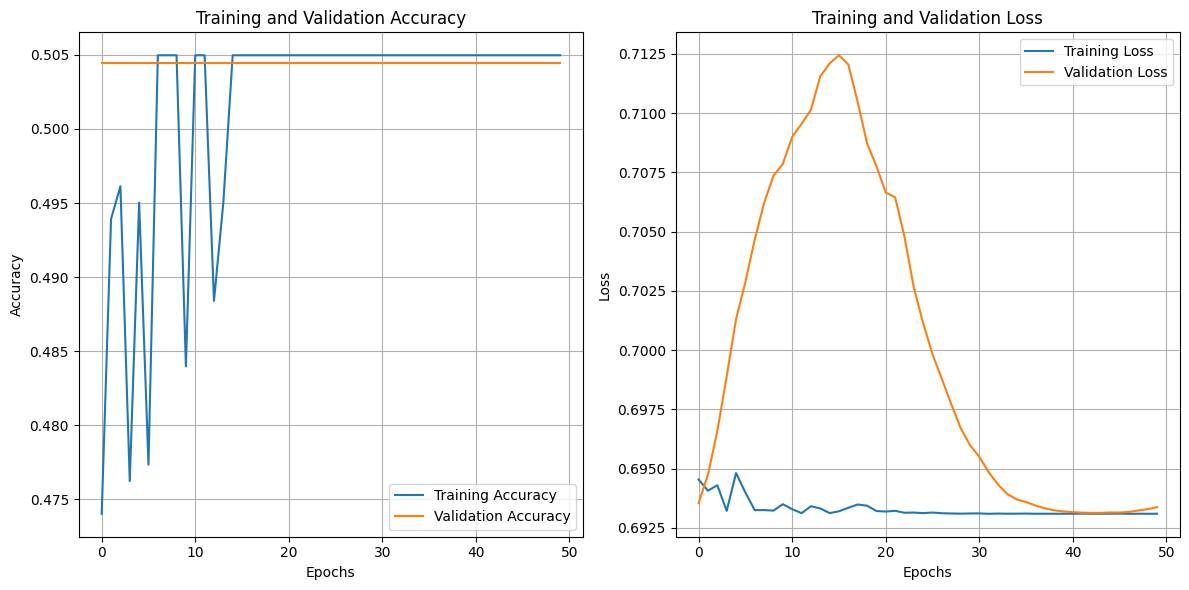

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# --- Custom Trainable PI Layer ---
class TrainablePILayer(layers.Layer):
    def __init__(self, target_intensity=1.0, max_iter=5):
        super(TrainablePILayer, self).__init__()
        self.target_intensity = target_intensity
        self.max_iter = max_iter

    def build(self, input_shape):
        self.Kp = self.add_weight(name='Kp', shape=(), initializer=tf.constant_initializer(1.0), trainable=True)
        self.Ki = self.add_weight(name='Ki', shape=(), initializer=tf.constant_initializer(0.25), trainable=True)

    def call(self, inputs):
        x = tf.identity(inputs)
        integral_error = tf.constant(0.0, dtype=inputs.dtype)

        for _ in range(self.max_iter):
            current_mean = tf.reduce_mean(x)
            error = self.target_intensity - current_mean
            integral_error += error
            adjustment = self.Kp * error + self.Ki * integral_error
            x = x + adjustment
            x = tf.clip_by_value(x, 0.0, 1.0)

        return x

# --- CNN Model with PI Layer before first conv ---
class CNNWithPIConvOutput(Model):
    def __init__(self):
        super(CNNWithPIConvOutput, self).__init__()
        self.pi = TrainablePILayer()

        self.conv1 = layers.Conv2D(32, 3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.pool1 = layers.MaxPooling2D(2)

        self.conv2 = layers.Conv2D(64, 3, padding='same', activation='relu')
        self.bn2 = layers.BatchNormalization()
        self.pool2 = layers.MaxPooling2D(2)

        self.conv3 = layers.Conv2D(128, 3, padding='same', activation='relu')
        self.bn3 = layers.BatchNormalization()
        self.pool3 = layers.MaxPooling2D(2)

        self.out_conv = layers.Conv2D(1, kernel_size=1, activation='sigmoid')
        self.global_avg_pool = layers.GlobalAveragePooling2D()

    def call(self, inputs, training=False, return_features=False):
        x = self.pi(inputs)


        x = self.conv1(x)
        x = self.bn1(x, training=training)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x, training=training)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.bn3(x, training=training)
        x = self.pool3(x)

        x = self.out_conv(x)
        x = self.global_avg_pool(x)



        return x


# --- Data paths and preprocessing ---
train_dir = '/content/train111x'
val_dir = '/content/validation111x'
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# --- Model Training ---
model = CNNWithPIConvOutput()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1
)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=50,
    validation_data=val_data,
    callbacks=[lr_scheduler]
)

# --- Plot Training Curves ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

Found 905 images belonging to 2 classes.
Found 113 images belonging to 2 classes.
Found 115 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 691ms/step - accuracy: 0.4821 - loss: 0.6979 - val_accuracy: 0.4956 - val_loss: 0.6975
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 453ms/step - accuracy: 0.5012 - loss: 0.6967 - val_accuracy: 0.4956 - val_loss: 0.7046
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 458ms/step - accuracy: 0.4893 - loss: 0.6964 - val_accuracy: 0.4956 - val_loss: 0.7194
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 454ms/step - accuracy: 0.5495 - loss: 0.6912 - val_accuracy: 0.4956 - val_loss: 0.7479
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 457ms/step - accuracy: 0.5146 - loss: 0.6943 - val_accuracy: 0.4956 - val_loss: 0.7039
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 453ms/step - accuracy: 0.5035 - loss: 0.6962 - val_accuracy: 0.4956 - val_loss: 0.7048
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 459ms/step - accuracy: 0.4584 - loss: 0.6948 - val_accuracy: 0.4956 - val_loss: 0.7103
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 452ms/step - accuracy: 0.4889 - loss: 0.6946 - val_accu

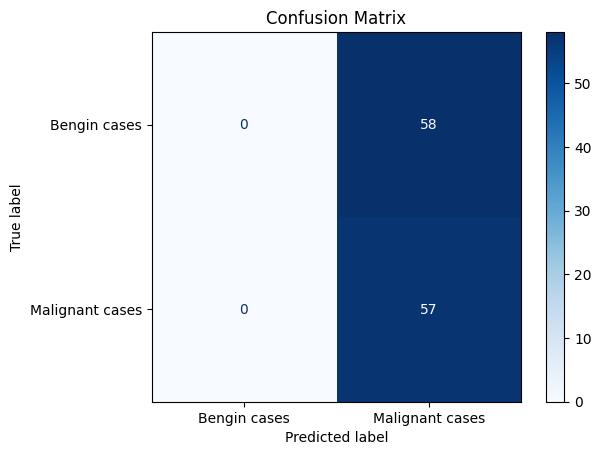

Accuracy:  0.4957
Precision: 0.4957
Recall:    1.0000
F1 Score:  0.6628
AUC-ROC:   0.5000


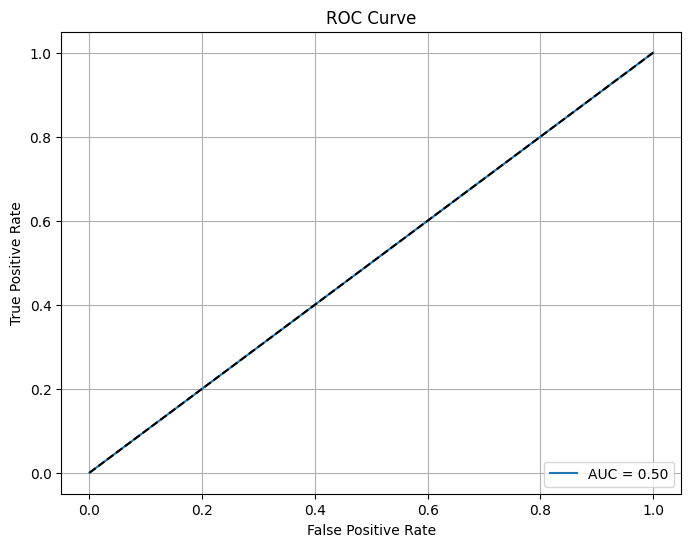

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, Model
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)

# --- Custom Trainable PI Layer ---
class TrainablePILayer(layers.Layer):
    def __init__(self, target_intensity=1.0, max_iter=5):
        super(TrainablePILayer, self).__init__()
        self.target_intensity = target_intensity
        self.max_iter = max_iter

    def build(self, input_shape):
        self.Kp = self.add_weight(name='Kp', shape=(), initializer=tf.constant_initializer(1.0), trainable=True)
        self.Ki = self.add_weight(name='Ki', shape=(), initializer=tf.constant_initializer(0.25), trainable=True)

    def call(self, inputs):
        x = tf.identity(inputs)
        integral_error = tf.constant(0.0, dtype=inputs.dtype)

        for _ in range(self.max_iter):
            current_mean = tf.reduce_mean(x)
            error = self.target_intensity - current_mean
            integral_error += error
            adjustment = self.Kp * error + self.Ki * integral_error
            x = x + adjustment
            x = tf.clip_by_value(x, 0.0, 1.0)

        return x

# --- CNN Model with PI Layer before first conv ---
class CNNWithPIConvOutput(Model):
    def __init__(self):
        super(CNNWithPIConvOutput, self).__init__()
        self.pi = TrainablePILayer()

        self.conv1 = layers.Conv2D(32, 3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.pool1 = layers.MaxPooling2D(2)

        self.conv2 = layers.Conv2D(64, 3, padding='same', activation='relu')
        self.bn2 = layers.BatchNormalization()
        self.pool2 = layers.MaxPooling2D(2)

        self.conv3 = layers.Conv2D(128, 3, padding='same', activation='relu')
        self.bn3 = layers.BatchNormalization()
        self.pool3 = layers.MaxPooling2D(2)

        self.out_conv = layers.Conv2D(1, kernel_size=1, activation='sigmoid')
        self.global_avg_pool = layers.GlobalAveragePooling2D()

    def call(self, inputs, training=False, return_features=False):
        x = self.pi(inputs)


        x = self.conv1(x)
        x = self.bn1(x, training=training)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x, training=training)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.bn3(x, training=training)
        x = self.pool3(x)

        x = self.out_conv(x)
        x = self.global_avg_pool(x)



        return x


# --- Parameters ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 50

# --- Data Preparation ---
train_dir = '/content/train111x'
val_dir = '/content/validation111x'
test_dir = '/content/test111x'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# --- Model Instantiation and Compilation ---
model = CNNWithPIConvOutput()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# --- Train the Model (no callbacks) ---
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# --- Evaluate on Test Data ---
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# --- Predictions ---
pred_probs = model.predict(test_generator)
pred_classes = (pred_probs > 0.5).astype(int).ravel()
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# --- Confusion Matrix ---
cm = confusion_matrix(true_classes, pred_classes)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# --- Metrics ---
accuracy = accuracy_score(true_classes, pred_classes)
precision = precision_score(true_classes, pred_classes, zero_division=0)
recall = recall_score(true_classes, pred_classes, zero_division=0)
f1 = f1_score(true_classes, pred_classes, zero_division=0)
auc = roc_auc_score(true_classes, pred_probs)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(true_classes, pred_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Found 905 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4844 - loss: 0.6950 - val_accuracy: 0.4956 - val_loss: 0.6950 - learning_rate: 1.0000e-04
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 889ms/step - accuracy: 0.5248 - loss: 0.6919 - val_accuracy: 0.4956 - val_loss: 0.7041 - learning_rate: 1.0000e-04
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 907ms/step - accuracy: 0.5209 - loss: 0.6933 - val_accuracy: 0.4956 - val_loss: 0.7019 - learning_rate: 1.0000e-04
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 901ms/step - accuracy: 0.4792 - loss: 0.6942 - val_accuracy: 0.4956 - val_loss: 0.6954 - learning_rate: 1.0000e-04
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 896ms/step - accuracy: 0.5294 - loss: 0.6932 - val_accuracy: 0.4956 - val_loss: 0.6954 - learning_rate: 1.0000e-04
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 915ms/step - accuracy: 0.4876 - loss: 0.6935
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 943ms/step - accuracy: 0.

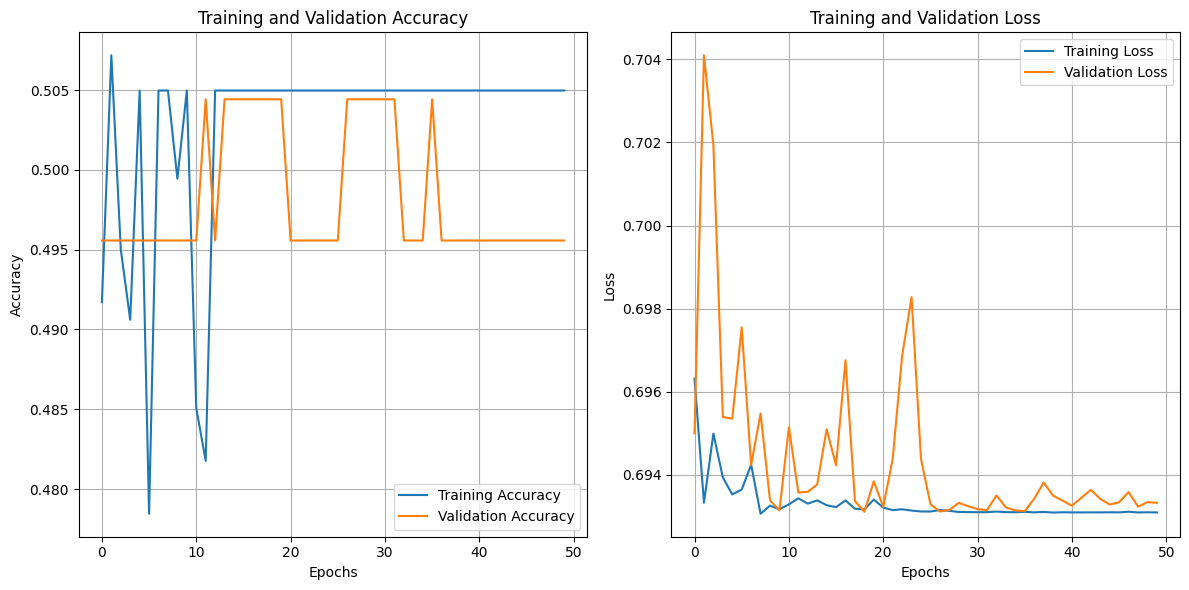

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# --- Custom Trainable PI Layer ---
class TrainablePILayer(layers.Layer):
    def __init__(self, target_intensity=1.0, max_iter=5):
        super(TrainablePILayer, self).__init__()
        self.target_intensity = target_intensity
        self.max_iter = max_iter

    def build(self, input_shape):
        self.Kp = self.add_weight(name='Kp', shape=(), initializer=tf.constant_initializer(1.0), trainable=True)
        self.Ki = self.add_weight(name='Ki', shape=(), initializer=tf.constant_initializer(0.25), trainable=True)

    def call(self, inputs):
        x = tf.identity(inputs)
        integral_error = tf.constant(0.0, dtype=inputs.dtype)

        for _ in range(self.max_iter):
            current_mean = tf.reduce_mean(x)
            error = self.target_intensity - current_mean
            integral_error += error
            adjustment = self.Kp * error + self.Ki * integral_error
            x = x + adjustment
            x = tf.clip_by_value(x, 0.0, 1.0)

        return x

# --- CNN Model with PI Layer ---
class CNNWithPIConvOutput(Model):
    def __init__(self):
        super(CNNWithPIConvOutput, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.pool1 = layers.MaxPooling2D(2)

        self.pi = TrainablePILayer()

        self.conv2 = layers.Conv2D(64, 3, padding='same', activation='relu')
        self.bn2 = layers.BatchNormalization()
        self.pool2 = layers.MaxPooling2D(2)

        self.conv3 = layers.Conv2D(128, 3, padding='same', activation='relu')
        self.bn3 = layers.BatchNormalization()
        self.pool3 = layers.MaxPooling2D(2)

        self.out_conv = layers.Conv2D(1, kernel_size=1, activation='sigmoid')
        self.global_avg_pool = layers.GlobalAveragePooling2D()

    def call(self, inputs, training=False, return_features=False):
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.pool1(x)

        feat_before = x
        x = self.pi(x)
        feat_after = x

        x = self.conv2(x)
        x = self.bn2(x, training=training)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.bn3(x, training=training)
        x = self.pool3(x)

        x = self.out_conv(x)
        x = self.global_avg_pool(x)

        if return_features:
            return x, feat_before, feat_after
        return x

# --- Data paths and preprocessing ---
train_dir = '/content/train111x'
val_dir = '/content/validation111x'
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# --- Model Training ---
model = CNNWithPIConvOutput()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1
)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=50,
    validation_data=val_data,
    callbacks=[lr_scheduler]
)

# --- Plot Training Curves ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)

plt.tight_layout()
plt.show()


Found 905 images belonging to 2 classes.
Found 113 images belonging to 2 classes.
Found 115 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 629ms/step - accuracy: 0.4949 - loss: 0.6996 - val_accuracy: 0.5044 - val_loss: 1.0422
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 481ms/step - accuracy: 0.4771 - loss: 0.6974 - val_accuracy: 0.5044 - val_loss: 0.6964
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 483ms/step - accuracy: 0.4960 - loss: 0.6949 - val_accuracy: 0.5044 - val_loss: 0.7677
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 462ms/step - accuracy: 0.5212 - loss: 0.6929 - val_accuracy: 0.4956 - val_loss: 0.7090
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 472ms/step - accuracy: 0.5183 - loss: 0.6946 - val_accuracy: 0.5044 - val_loss: 0.7396
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 459ms/step - accuracy: 0.5221 - loss: 0.6936 - val_accuracy: 0.4956 - val_loss: 0.7388
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 454ms/step - accuracy: 0.5184 - loss: 0.6922 - val_accuracy: 0.5044 - val_loss: 0.7213
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 460ms/step - accuracy: 0.4944 - loss: 0.6958 - val_accu

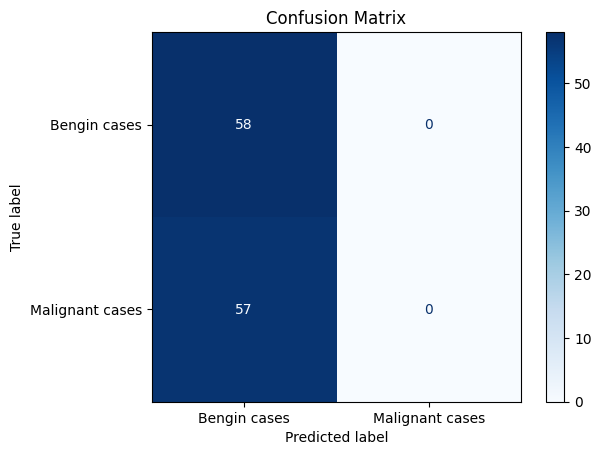

Accuracy:  0.5043
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000
AUC-ROC:   0.5000


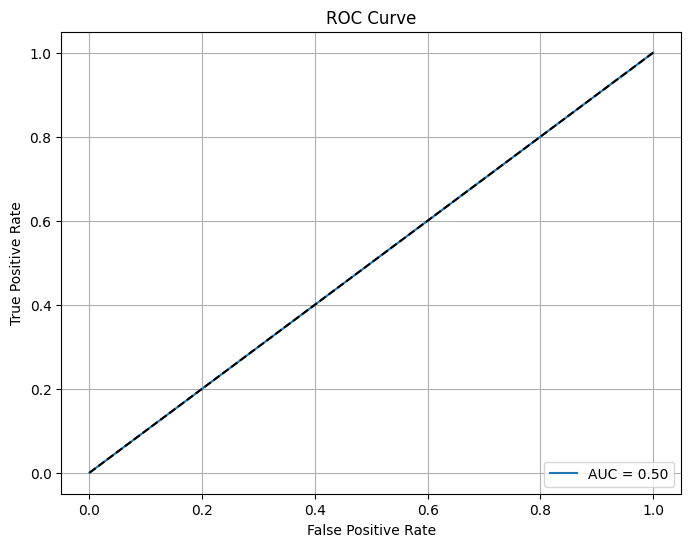

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)

# --- Custom Trainable PI Layer ---
class TrainablePILayer(layers.Layer):
    def __init__(self, target_intensity=1.0, max_iter=5):
        super(TrainablePILayer, self).__init__()
        self.target_intensity = target_intensity
        self.max_iter = max_iter

    def build(self, input_shape):
        self.Kp = self.add_weight(name='Kp', shape=(), initializer=tf.constant_initializer(1.0), trainable=True)
        self.Ki = self.add_weight(name='Ki', shape=(), initializer=tf.constant_initializer(0.25), trainable=True)

    def call(self, inputs):
        x = tf.identity(inputs)
        integral_error = tf.constant(0.0, dtype=inputs.dtype)

        for _ in range(self.max_iter):
            current_mean = tf.reduce_mean(x)
            error = self.target_intensity - current_mean
            integral_error += error
            adjustment = self.Kp * error + self.Ki * integral_error
            x = x + adjustment
            x = tf.clip_by_value(x, 0.0, 1.0)

        return x

# --- CNN Model with PI Layer ---
class CNNWithPIConvOutput(Model):
    def __init__(self):
        super(CNNWithPIConvOutput, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.pool1 = layers.MaxPooling2D(2)

        self.pi = TrainablePILayer()

        self.conv2 = layers.Conv2D(64, 3, padding='same', activation='relu')
        self.bn2 = layers.BatchNormalization()
        self.pool2 = layers.MaxPooling2D(2)

        self.conv3 = layers.Conv2D(128, 3, padding='same', activation='relu')
        self.bn3 = layers.BatchNormalization()
        self.pool3 = layers.MaxPooling2D(2)

        self.out_conv = layers.Conv2D(1, kernel_size=1, activation='sigmoid')
        self.global_avg_pool = layers.GlobalAveragePooling2D()

    def call(self, inputs, training=False, return_features=False):
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.pool1(x)

        feat_before = x
        x = self.pi(x)
        feat_after = x

        x = self.conv2(x)
        x = self.bn2(x, training=training)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.bn3(x, training=training)
        x = self.pool3(x)

        x = self.out_conv(x)
        x = self.global_avg_pool(x)

        if return_features:
            return x, feat_before, feat_after
        return x

# --- Parameters ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 50

# --- Data Preparation ---
train_dir = '/content/train111x'
val_dir = '/content/validation111x'
test_dir = '/content/test111x'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# --- Model Instantiation and Compilation ---
model = CNNWithPIConvOutput()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# --- Train the Model (no callbacks) ---
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# --- Evaluate on Test Data ---
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# --- Predictions ---
pred_probs = model.predict(test_generator)
pred_classes = (pred_probs > 0.5).astype(int).ravel()
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# --- Confusion Matrix ---
cm = confusion_matrix(true_classes, pred_classes)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# --- Metrics ---
accuracy = accuracy_score(true_classes, pred_classes)
precision = precision_score(true_classes, pred_classes, zero_division=0)
recall = recall_score(true_classes, pred_classes, zero_division=0)
f1 = f1_score(true_classes, pred_classes, zero_division=0)
auc = roc_auc_score(true_classes, pred_probs)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(true_classes, pred_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()